In [1]:
from google.colab.patches import cv2_imshow
%matplotlib inline
import matplotlib
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [38]:
#Caminho imagens Centro
caminho_carto_preenc = '/content/drive/MyDrive/Colab Notebooks/UNIVESP/PI/PYTHON_MAPAS/VERSÃO_FINAL/IMAGENS/centro_carto_preenc.png'
caminho_carto_linha = '/content/drive/MyDrive/Colab Notebooks/UNIVESP/PI/PYTHON_MAPAS/VERSÃO_FINAL/IMAGENS/centro_carto_linha.png'
caminho_sat_linha = '/content/drive/MyDrive/Colab Notebooks/UNIVESP/PI/PYTHON_MAPAS/VERSÃO_FINAL/IMAGENS/centro_sat_linha.png'

In [ ]:
# Caminho imagens Chervezon
caminho_carto_preenc =
caminho_sat_linha =

In [ ]:
# Caminho imagens Floridiana
caminho_carto_preenc =
caminho_sat_linha =

In [22]:
# Carregar imagem cartodb do bairro
img = cv2.imread(caminho_carto_preenc, cv2.IMREAD_UNCHANGED)
# Remove o canal alfa
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
#Converte em CINZA
imgCinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

kernel = np.ones((5,5),np.uint8)
# Desfocando e apagando pequenos detalhes
imgSuavizada = cv2.GaussianBlur(imgCinza,(13,13),3)
imgSuavizada = cv2.morphologyEx(imgSuavizada, cv2.MORPH_OPEN, kernel)
imgSuavizada = cv2.morphologyEx(imgSuavizada, cv2.MORPH_CLOSE, kernel)

(768, 1366)
90644


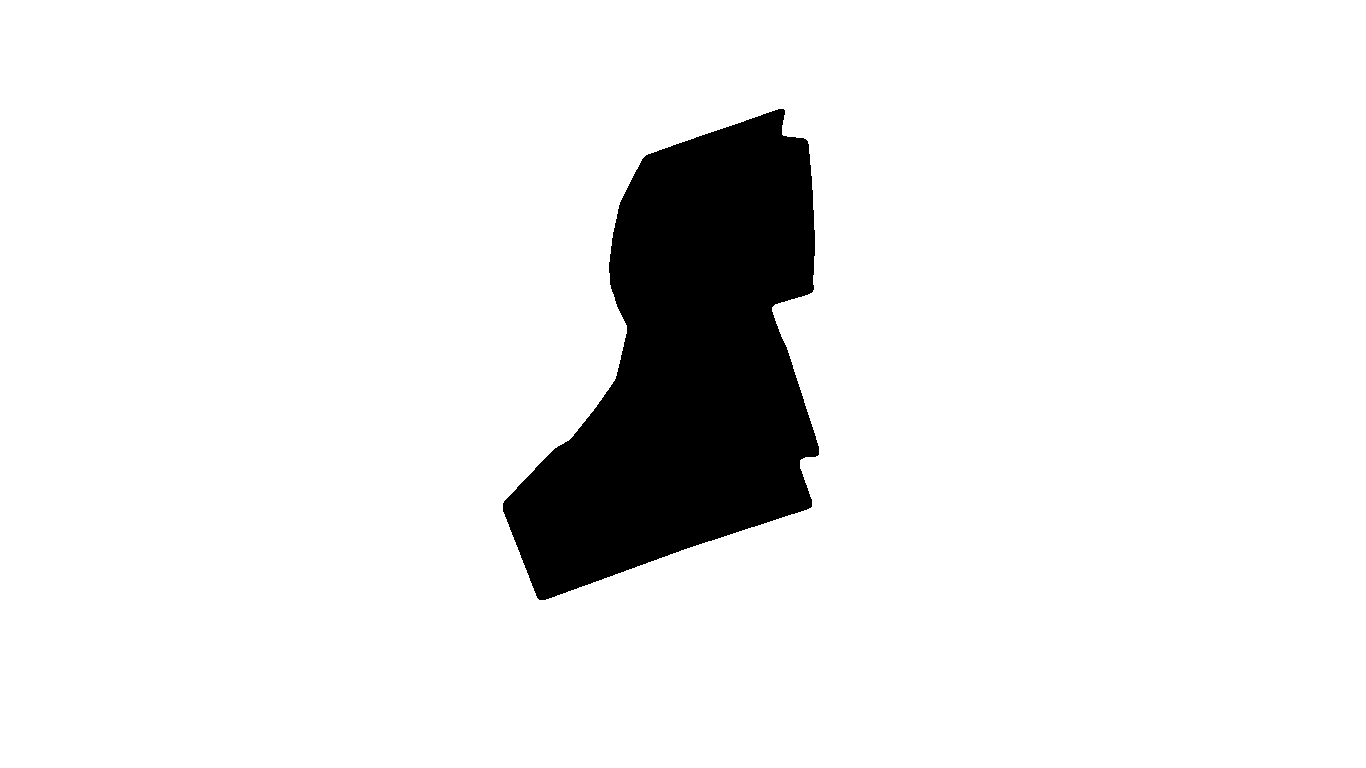

In [23]:
# Criar máscara 1
metodo = cv2.THRESH_BINARY
ret, imgBinarizada = cv2.threshold(imgSuavizada, 127,255, metodo)

# Cáculo pixels polígono
numeroPixelsPoligono = np.sum(imgBinarizada == 0)
print(imgBinarizada.shape)

print(numeroPixelsPoligono)
cv2_imshow(imgBinarizada)

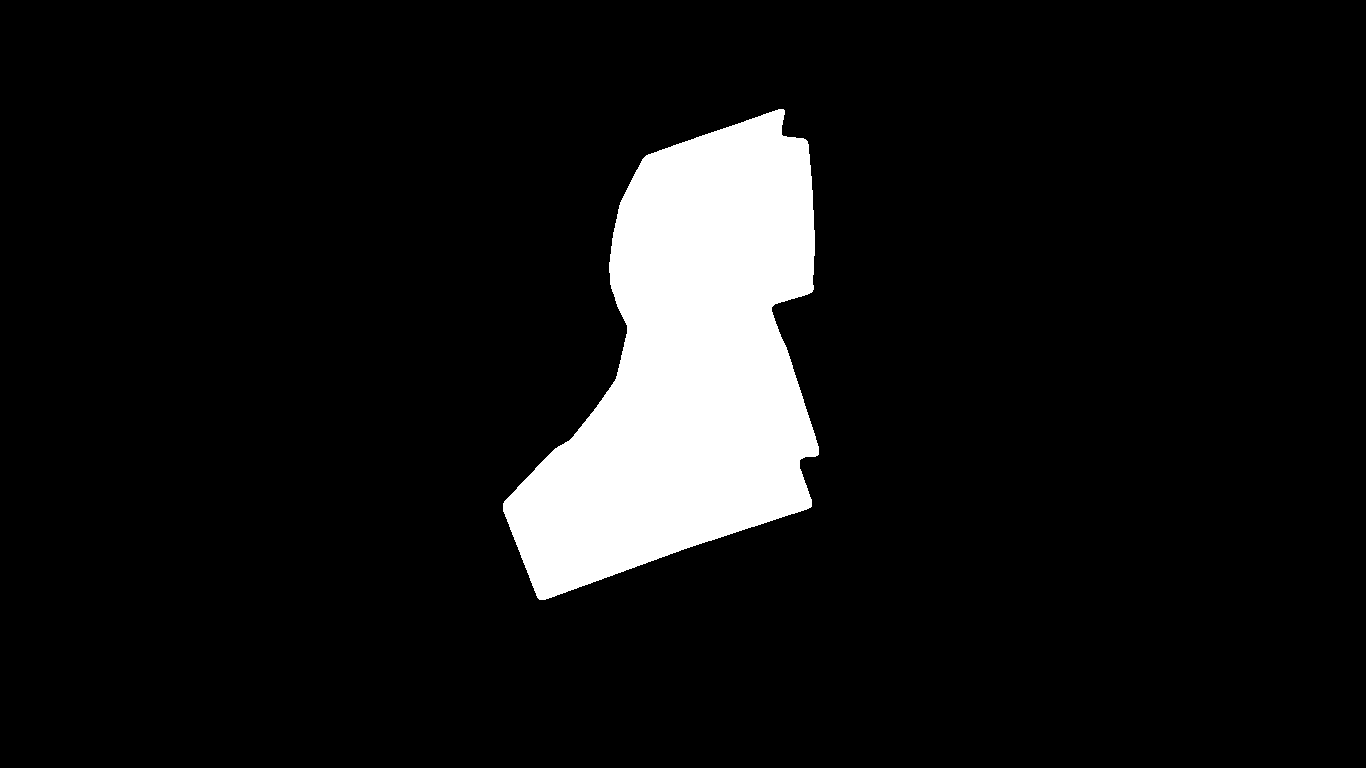

In [24]:
# Criar máscara 2
metodo2 = cv2.THRESH_BINARY_INV
ret, imgBinarizada2 = cv2.threshold(imgSuavizada, 127,255, metodo2)
cv2_imshow(imgBinarizada2)

In [37]:
# Carregar imagem de satélite do bairro
imgBGR = cv2.imread(caminho_sat_linha, cv2.IMREAD_UNCHANGED)
# Remove o canal alfa
imgBGR = cv2.cvtColor(imgBGR, cv2.COLOR_BGRA2BGR)

# Recorta máscara 1 da imagem de satélite
res = cv2.bitwise_and(imgBGR, imgBGR, mask=imgBinarizada)

cv2_imshow(res)

Output hidden; open in https://colab.research.google.com to view.

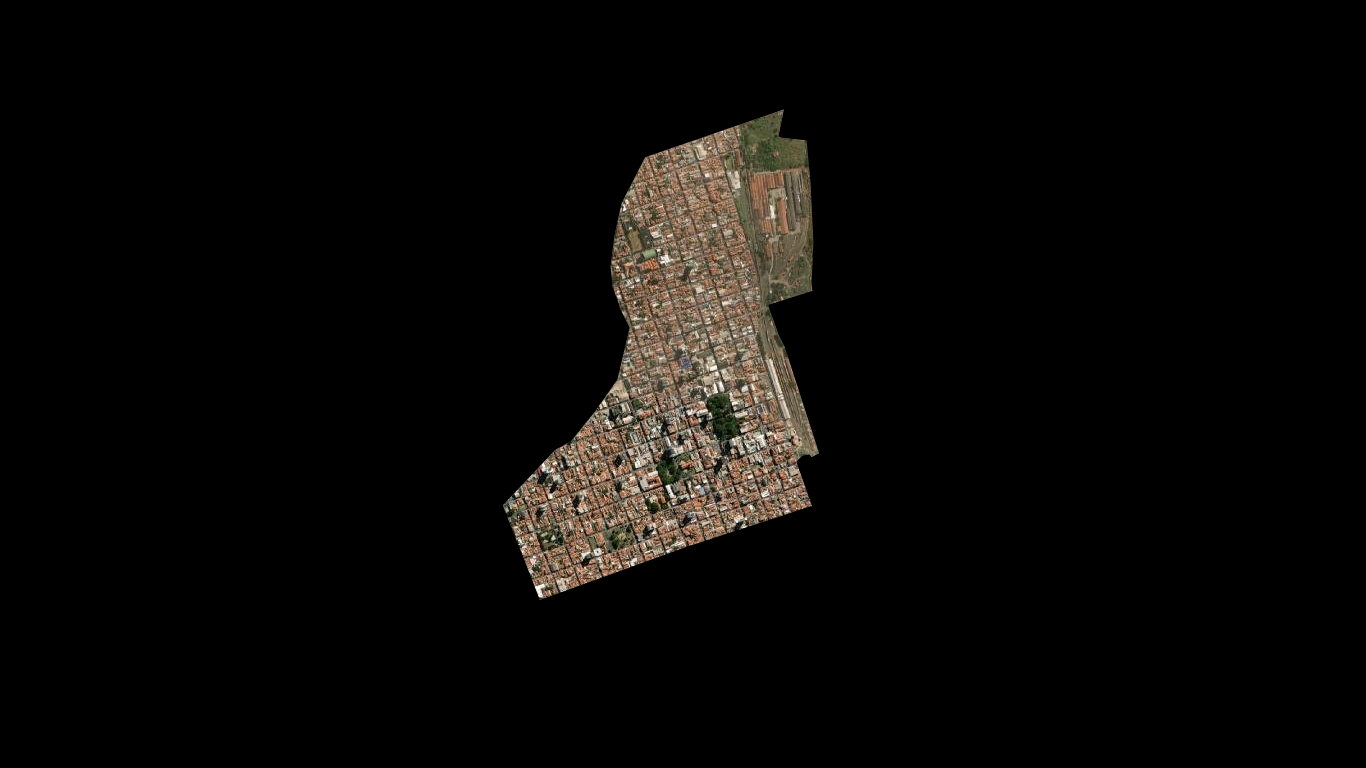

In [33]:
# Recorta máscara 2 da imagem de satélite
res2 = cv2.bitwise_and(imgBGR, imgBGR, mask=imgBinarizada2)
cv2_imshow(res2)

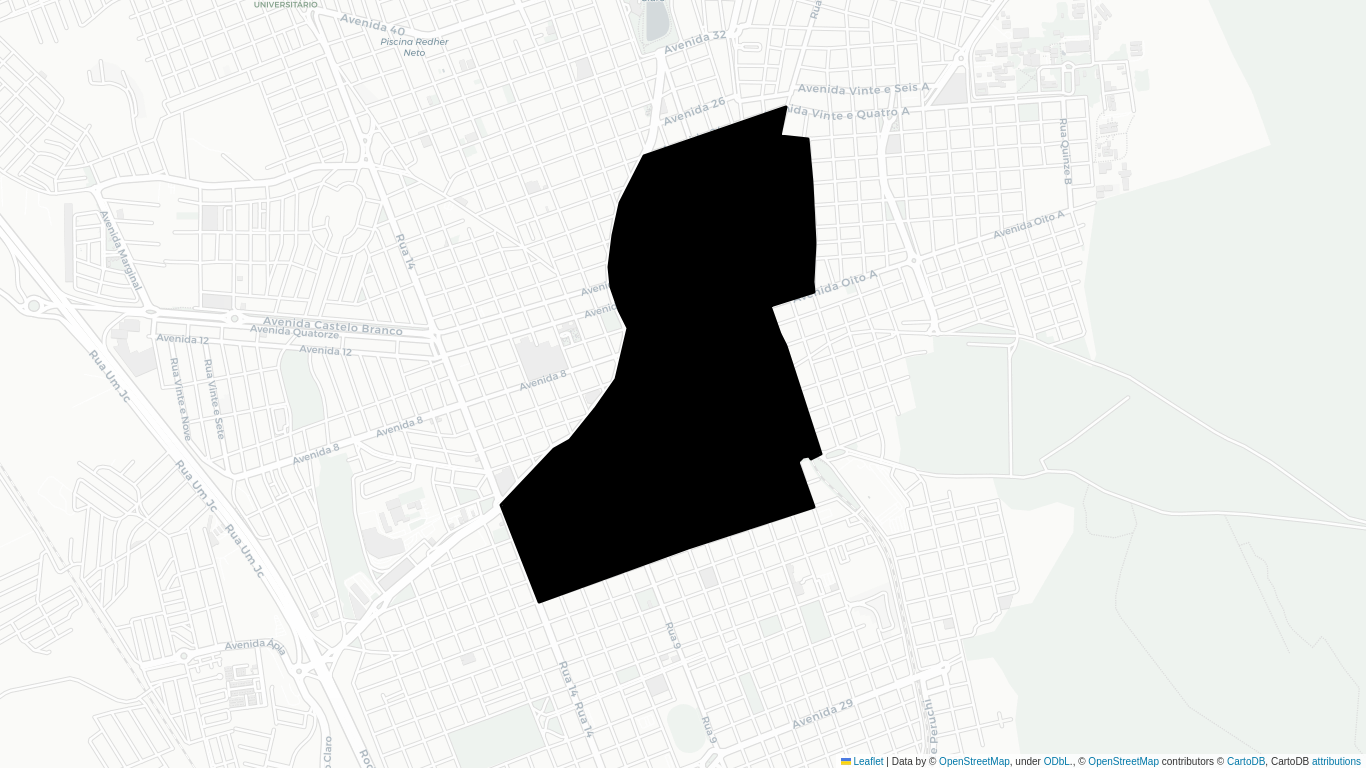

In [39]:
# Carregar imagem do cartoDB do bairro
imgBGR = cv2.imread(caminho_carto_linha, cv2.IMREAD_UNCHANGED)
# Remove o canal alfa
imgBGR = cv2.cvtColor(imgBGR, cv2.COLOR_BGRA2BGR)

# Recorta máscara 1 da imagem de satélite
res4 = cv2.bitwise_and(imgBGR, imgBGR, mask=imgBinarizada)

cv2_imshow(res4)

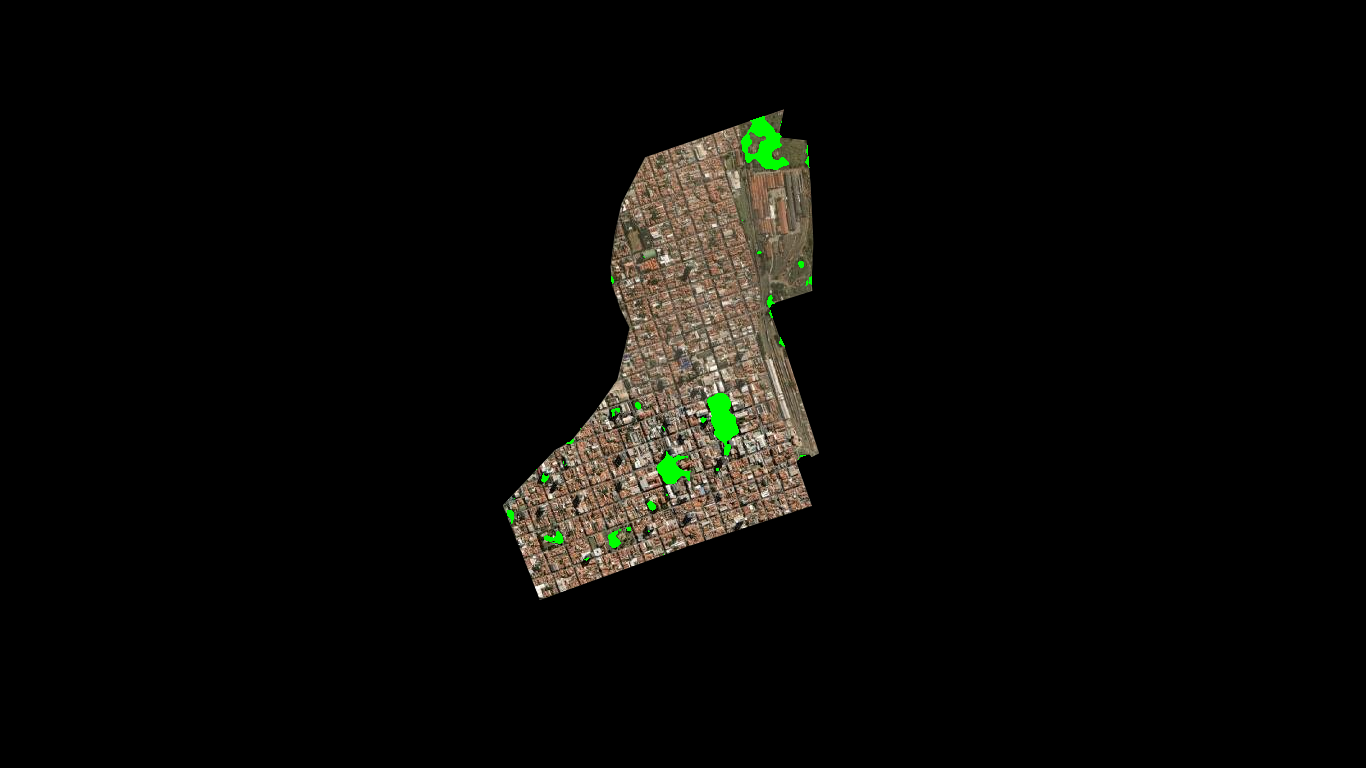

Número de pixels polígono: 90644
Número de pixels área verde: 3854
Índice: 4.08 %


In [34]:
# Convertendo espectro da imagem
imgHSV = cv2.cvtColor(res2, cv2.COLOR_RGB2HSV)

# filtro de mediana
imgHSV = cv2.medianBlur(imgHSV ,7)

# Dividindo a imagem em canais
matriz, saturacao, valor = cv2.split(imgHSV)

# Definindo valores mínimos e máximos do filtro de cor
tomClaro = np.array([25,45,0])
tomEscuro = np.array([87,255,92])

# Aplicando o filtro de cor
mask = cv2.inRange(imgHSV,tomClaro,tomEscuro)


# Invertendo a binarização da imagem (metodo2=BINARY_INV)
ret, mask = cv2.threshold(mask, 127,255, metodo2)

# Juntado a imagem de entrada mais a máscara resutante do filtro de cor
res3 = cv2.bitwise_and(res2, res2, mask= mask)

# Cáculo percentual de cobertura vegetal
numeroPixelsVerde = np.sum(mask == 0)
indice = (numeroPixelsVerde*100)/(numeroPixelsPoligono+numeroPixelsVerde)

#print(res.shape)

res3[mask<255]=(0,255,0)

#print(img.shape)
#print(img.size)
#cv2_imshow(img)
#cv2_imshow(mask)
cv2_imshow(res3)

print('Número de pixels polígono:', numeroPixelsPoligono)
print('Número de pixels área verde:', numeroPixelsVerde)
#print('Índice: ', indice, '%')
print("Índice: {:.2f} %".format(indice))

In [35]:
# Juntado as imagens de dentro (sat) e fora do preenchimento (sat)
imgFinal = cv2.add(res, res3)
cv2_imshow(imgFinal)

print('Número de pixels polígono:', numeroPixelsPoligono)
print('Número de pixels área verde:', numeroPixelsVerde)
#print('Índice: ', indice, '%')
print("Índice: {:.2f} %".format(indice))

Output hidden; open in https://colab.research.google.com to view.

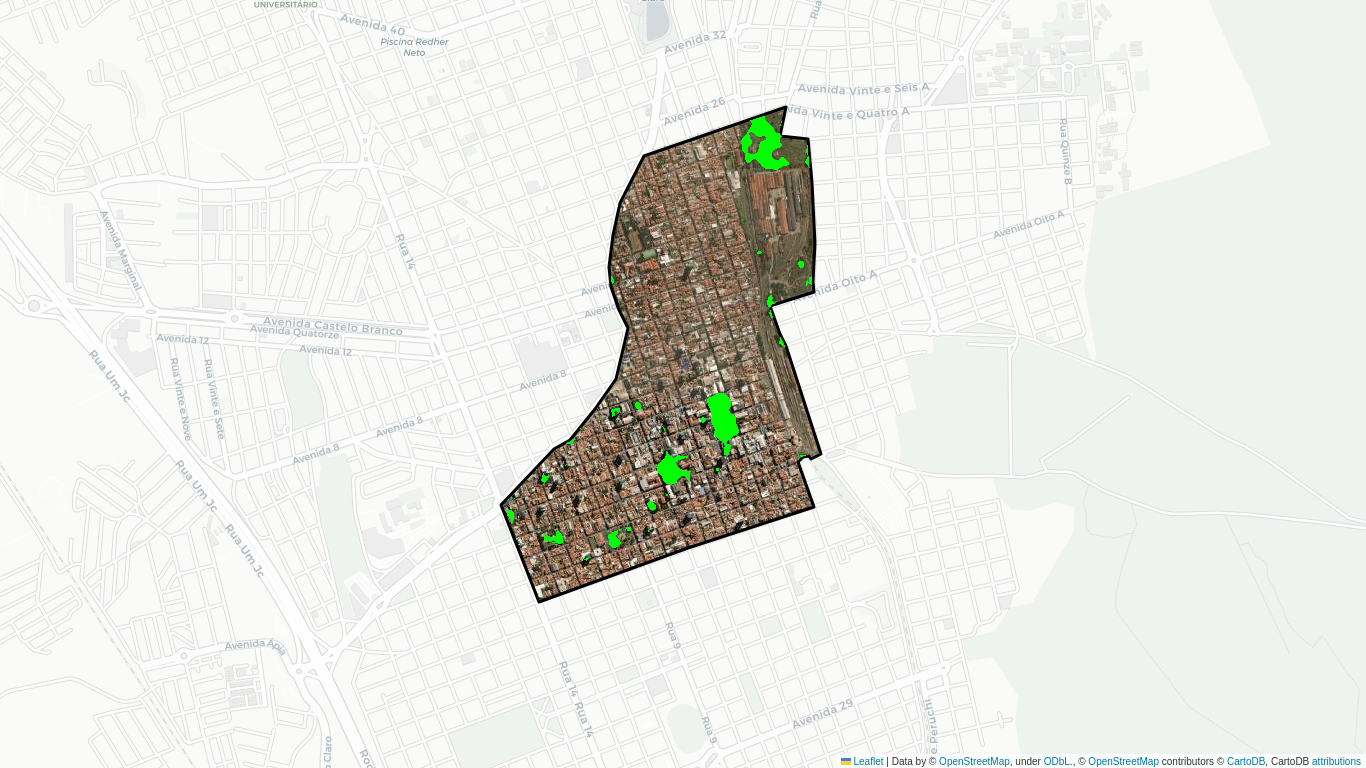

Número de pixels polígono: 90644
Número de pixels área verde: 3854
Índice: 4.08 %


In [41]:
# Juntado as imagens de dentro (sat) e fora do preenchimento (carto)
imgFinal = cv2.add(res3, res4)
cv2_imshow(imgFinal)

print('Número de pixels polígono:', numeroPixelsPoligono)
print('Número de pixels área verde:', numeroPixelsVerde)
#print('Índice: ', indice, '%')
print("Índice: {:.2f} %".format(indice))

In [36]:
# Carregar imagem de satélite do bairro
imgBGRLinha = cv2.imread(caminho_sat_linha, cv2.IMREAD_UNCHANGED)
# Remove o canal alfa
imgBGRLinha = cv2.cvtColor(imgBGRLinha, cv2.COLOR_BGRA2BGR)

#Juntado as imagens de dentro (sat) e fora do preenchimento (sat) com pesos diferentes para gerar transparência
imgFinal2 = cv2.add(imgFinal*0.5, imgBGRLinha*0.5)
cv2_imshow(imgFinal2)

print('Número de pixels polígono:', numeroPixelsPoligono)
print('Número de pixels área verde:', numeroPixelsVerde)
#print('Índice: ', indice, '%')
print("Índice: {:.2f} %".format(indice))

Output hidden; open in https://colab.research.google.com to view.